下面这个语句是为了在 notebook中显示 matplotlib的绘图

In [ ]:
%matplotlib inline

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series,DataFrame

In [ ]:
data = pd.DataFrame()
a = [[1,2,3]]
data = data.append(a)
print(data)

### Series
通过列表可以创建Series，Pandas会自动创建整型索引。

In [2]:
s=Series([1,3,5,np.nan,6,8]) #值的类型会自动统一
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [3]:
s.sort_values()

0    1.0
1    3.0
2    5.0
4    6.0
5    8.0
3    NaN
dtype: float64

In [4]:
s.values

array([ 1.,  3.,  5., nan,  6.,  8.])

In [5]:
s.index

RangeIndex(start=0, stop=6, step=1)

In [6]:
s2 = pd.Series([3,51,5,2,6],index=['a','b','c','d','e'])#自己定义索引
s2

a     3
b    51
c     5
d     2
e     6
dtype: int64

In [7]:
s2.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [8]:
s2['d']

2

In [9]:
s2[['a','d','c']]

a    3
d    2
c    5
dtype: int64

In [10]:
'c' in s2

True

同时可以当作字典

In [11]:
sdata = {'Ohio':35000, 'Texas':7000, 'Orange':10902}
s3 = pd.Series(sdata)
s3

Ohio      35000
Texas      7000
Orange    10902
dtype: int64

In [12]:
pd.isnull(s3)

Ohio      False
Texas     False
Orange    False
dtype: bool

In [ ]:
pd.notnull(s3)

In [ ]:
s3.isnull()

Series对象及其索引有一个name属性

In [ ]:
s3.name = 'alvin'
s3.index.name = 'state'
s3

In [ ]:
s3.index = ['a','b','f'] #整体更换索引，但不能单独替换某个索引指
s3

### DataFrame

通过NumPy的数组可以创建一个DataFrame。

In [13]:
dates=pd.date_range('20130101',periods=6)
print(dates)
df=pd.DataFrame(np.random.randn(6,4),index=dates,columns=list('ABCD'))
df

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')


,A,B,C,D
2013-01-01,0.033111,2.395731,-0.315315,-0.078379
2013-01-02,0.651825,1.502804,-1.434456,-0.675792
2013-01-03,1.654832,-0.251978,-2.329942,-1.927006
2013-01-04,0.243191,1.049395,-0.730652,0.647298
2013-01-05,-0.347569,-0.300603,-1.019329,0.057461
2013-01-06,1.769925,0.016089,-0.798792,0.802494


也可以通过字典来创建DataFrame

In [15]:
# 在爬虫的时候可以用来保存数据
df2 = pd.DataFrame({'A':1.,
                 'B':pd.Timestamp('20130102'),
                 'C':pd.Series(1,index=list(range(4)),dtype='float32'),
                 'D':np.array([3]*4,dtype='int32'),
                 'E':pd.Categorical(['test','train','test','train']),
                 'F':'foo'})
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [16]:
df2.dtypes #每一列（column）类型不同

A          float64
B    datetime64[s]
C          float32
D            int32
E         category
F           object
dtype: object

In [18]:
# 需要保证，值的长度是相同的，否则：ValueError: Length of values (4) does not match length of index (5)
data={'state':['Ohio','Ohio','Ohio','Nevada','Nevada'],
      'year':[2000, 2001, 2002, 2001, 2002],
      'pop':[1.5, 1.7, 3.6, 2.4, 2.9]}
df3 = pd.DataFrame(data,columns=['year', 'state', 'pop', 'debt'],
            index=['one', 'two', 'three', 'four', 'five'])

df3


,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN


In [19]:
df3['debt'] = 16  #给一个列（column）赋值
df3

,year,state,pop,debt
one,2000,Ohio,1.5,16
two,2001,Ohio,1.7,16
three,2002,Ohio,3.6,16
four,2001,Nevada,2.4,16
five,2002,Nevada,2.9,16


### 查看数据
查看数据的顶部和底部

In [20]:
print(df.head(3))
print(df.tail(3))

                   A         B         C         D
2013-01-01  0.033111  2.395731 -0.315315 -0.078379
2013-01-02  0.651825  1.502804 -1.434456 -0.675792
2013-01-03  1.654832 -0.251978 -2.329942 -1.927006
                   A         B         C         D
2013-01-04  0.243191  1.049395 -0.730652  0.647298
2013-01-05 -0.347569 -0.300603 -1.019329  0.057461
2013-01-06  1.769925  0.016089 -0.798792  0.802494


查看索引，列名，以及纯的NumPy数据

In [21]:
print(df.index)
print(df.columns)
print(df.values)

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')
Index(['A', 'B', 'C', 'D'], dtype='object')
[[ 0.03311096  2.3957306  -0.31531462 -0.07837934]
 [ 0.65182538  1.50280377 -1.43445622 -0.6757924 ]
 [ 1.6548318  -0.251978   -2.32994203 -1.92700575]
 [ 0.24319127  1.04939478 -0.73065222  0.64729791]
 [-0.34756898 -0.30060339 -1.0193294   0.05746099]
 [ 1.76992499  0.01608877 -0.79879207  0.80249359]]


```DataFrame.describe()```提供了便捷的数据统计

1、count：返回数组的个数，如上述为4个元素，所以返回为4；

2、mean：返回数组的平均e79fa5e98193e59b9ee7ad9431333433623135值，1 3 5 9的平均值为4.5；

3、std：返回数组的标准差；

4、min：返回数组的最小值；

5、25%，50%，75%：返回数组的三个不同百分位置的数值，也就是统计学中的四分位数。

6、 max：最大值

In [25]:
df

,A,B,C,D
2013-01-01,0.033111,2.395731,-0.315315,-0.078379
2013-01-02,0.651825,1.502804,-1.434456,-0.675792
2013-01-03,1.654832,-0.251978,-2.329942,-1.927006
2013-01-04,0.243191,1.049395,-0.730652,0.647298
2013-01-05,-0.347569,-0.300603,-1.019329,0.057461
2013-01-06,1.769925,0.016089,-0.798792,0.802494


In [23]:
# 描述性统计必备
print(df.describe().T)

   count      mean       std       min       25%       50%       75%       max
A    6.0  0.667553  0.872154 -0.347569  0.085631  0.447508  1.404080  1.769925
B    6.0  0.735239  1.096342 -0.300603 -0.184961  0.532742  1.389452  2.395731
C    6.0 -1.104748  0.703401 -2.329942 -1.330675 -0.909061 -0.747687 -0.315315
D    6.0 -0.195654  1.001279 -1.927006 -0.526439 -0.010459  0.499839  0.802494


按照值进行排序

In [29]:
df.sort_values(by='C')

,A,B,C,D
2013-01-03,1.654832,-0.251978,-2.329942,-1.927006
2013-01-02,0.651825,1.502804,-1.434456,-0.675792
2013-01-05,-0.347569,-0.300603,-1.019329,0.057461
2013-01-06,1.769925,0.016089,-0.798792,0.802494
2013-01-04,0.243191,1.049395,-0.730652,0.647298
2013-01-01,0.033111,2.395731,-0.315315,-0.078379


### 数据选择
**注意：**尽管Python标准库和NumPy的语句在选择和设置数据时更直观和方便交互。但是在生产环境中，我们更建议使用Pandas的数据访问函数：```.at, .iat, .loc, .iloc, .ix```

#### 数据获取
选择一列，返回Series。等同于df.A

In [ ]:
df

In [ ]:
df[['A','D']]

使用```[]```来切分多行数据

In [ ]:
print(df[0:3])
print(df['20130102':'20130104'])

#### 根据标签选择
使用标签来得到特定的一行,loc根据两个方向的index来选取

In [ ]:
#dates 是 df的 index
df.loc[dates[0]]

使用标签来得到多个指定的列

In [ ]:
print(df.loc[:,['A','B']])

用标签来切片时，端点的值都是被包含在内的

In [ ]:
print(df.loc['20130102':'20130104',['A']])

选择的返回值可以降低维度

In [ ]:
df.loc['20130102',['A','B']]

选择一个标量

In [ ]:
df.loc[dates[0],'A']

快速获取一个标量（与上面相同）

In [ ]:
df.at[dates[0],'A']

#### 根据位置进行选择
根据整数下标来选择数据；iloc  根据 index的具体位置来获取

In [ ]:
print(df)
df.iloc[3]

用整数来切片，类似于Python标准库和NumPy

In [ ]:
print(df.iloc[3:5,0:2])

用整数列表来进行选择，与Python标准库和NumPy类似

In [ ]:
print(df.iloc[[1,2,4],[0,2]])

对行进行切片选择

In [ ]:
print(df.iloc[1:3,:])

对列进行切片选择

In [ ]:
print(df.iloc[:,1:3])

获取某个标量

In [ ]:
df.iloc[1,1]

快速地获取某个标量（与上面的函数相同）

In [ ]:
df.iat[1,1]

.loc for label based indexing

.iloc for positional indexing



In [ ]:
print(df.loc['2013-01-01','A':'B'])
print(df.iloc[0,0:2])
print(df.ix[0,'A':'B'])

#### 布尔索引
使用某列值来选择数据

In [ ]:
print(df[df.A>0])  #可以进行按照条件过滤数据

从DataFrame中选择满足某条件的数据

In [ ]:
df

In [ ]:
print(df[df>0])

使用```isin()```函数来过滤数据

In [ ]:
df2=df.copy()
df2['E']=['one','one','two','three','four','three']
print(df2)
print(df2[df2['E'].isin(['two','four'])])

#### 设置数据
设置一个新列并设置索引

In [ ]:
s1=pd.Series([1,2,3,4,5,6],index=pd.date_range('20130102',periods=6))
df['F']=s1
df

根据标签来设置值
at函数
根据指定行index及列label，快速定位DataFrame的元素，选择列时仅支持列名

In [ ]:
df.at[dates[0],'A']=0
print(df)

根据位置的来设置值
与at的功能相同，只使用索引参数

In [ ]:
df.iat[0,1]=0
print(df)

使用NumPy数组来赋值

In [ ]:
df.loc[:,'D']=np.array([5]*len(df))
print(df)

在过滤的同时进行赋值

In [ ]:
df2=df.copy()
df2[df2>0]=-df2
print(df2)

### 处理缺失数据
Pandas主要使用```np.nan```来表示缺失数据。这个值不会加入在计算中。
重新索引允许你对某一轴的索引进行更改/添加/删除操作。这会返回操作数据的拷贝对象。

In [ ]:
df1=df.reindex(index=dates[0:4],columns=list(df.columns)+['E'])
df1.loc[dates[0]:dates[1],'E']=1
df1

删除含有缺失数据的行

In [ ]:
# print(df1.dropna(how='all')) #这一行所有值都为空时删除
print(df1.dropna(how='any'))#这一行有任意值为空时删除

In [ ]:
print(df1.dropna(how='any',axis=1))  #删除有空值的列

填充缺失数据

In [ ]:
print(df1['E'].fillna(value=5))  

获取数据中是```nan```的位置

In [ ]:
print(pd.isnull(df1))

### 基础操作
#### 基本的统计
操作默认排除了缺失的数据  
执行一个描述性的统计

In [ ]:
print(df)
df.mean()  #默认按列，每一列一般是一种数据类型

在另外的轴执行该操作

In [ ]:
df.mean(1)  #横向

In [ ]:
print(df3)
df3.mean(1)  #只对数值型平均

#### 直方图

In [30]:
s=pd.Series(np.random.randint(0,7,size=10))
print(s)
print(s.value_counts())

0    0
1    6
2    3
3    2
4    6
5    6
6    2
7    6
8    3
9    3
dtype: int64
6    4
3    3
2    2
0    1
Name: count, dtype: int64


### 数据合并
#### 数据拼接
Pandas提供了许多工具来根据索引逻辑和线性代数关系组合Series、DataFrame和Panel。
用```concat()```组合Pandas数据

In [ ]:
df=pd.DataFrame(np.random.randn(10,4))
print(df)
pieces=[df[:3],df[3:7],df[7:]]  #拆分
print(pd.concat(pieces))   #拼接还原

#### 数据关联
合并

In [ ]:
left=pd.DataFrame({'key':['foo','foo'],'lval':[1,2]})
right=pd.DataFrame({'key':['foo','foo'],'rval':[4,5]})
print(left)
print(right)
print(pd.merge(left,right,on='key'))

In [ ]:
left=pd.DataFrame({'key':['foo','bar'],'lval':[1,2]})
right=pd.DataFrame({'key':['foo','bar'],'rval':[4,5]})
print(left)
print(right)
print(pd.merge(left,right,on='key'))

#### 添加数据（Append）
给DataFrame添加行

In [ ]:
df=pd.DataFrame(np.random.randn(8,4),columns=['A','B','C','D'])
print(df)
s=df.iloc[3]
print(df.append(s,ignore_index=True))

### 分组
分组包含以下的一个或多个流程：
 - 分组 根据某种标准分组数据
 - 应用 对每个组应用一个函数
 - 组合 把分组的结果组合成一个整体结构

In [ ]:
df=pd.DataFrame({'A':['foo','bar','foo','bar','foo','bar','foo','foo'],'B' : ['one', 'one', 'two', 'three',
                              'two', 'two', 'one', 'three'],
                       'C' : np.random.randn(8),
                      'D' : np.random.randn(8)})
print(df)

分组并对分组后的结果求和

In [ ]:
print(df.groupby('A').sum())

根据多个列进行分组可以如下操作

In [ ]:
print(df.groupby(['A','B']).sum())

### 时间序列
Pandas拥有易用、强大且高效的方法来在频率变换中执行重采样操作（例如：把秒级别的数据转换成5分钟级别的数据）。这通常在金融应用中使用，但不仅限于金融应用。

In [ ]:
rng=pd.date_range('1/1/2012',periods=100,freq='S')   # 构造一个日期序列， 开始 1/1/2012  ， 1000个时间点, 频率S 表示秒
print(rng)
ts=pd.Series(np.random.randint(0,500,len(rng)),index=rng)  #构造一个随机数序列  长度100
print(ts.head(5))



In [ ]:
ts_sample=ts.resample('5S').sum()   #按照5秒重采样 聚合，  sum表示采样后按求和运算
ts_sample

表现时区

In [ ]:
rng=pd.date_range('3/6/2012 00:00',periods=5,freq='D')
ts=pd.Series(np.random.randn(len(rng)),rng)
print(ts)
ts_utc=ts.tz_localize('UTC')
ts_utc

转换到其他时区

In [ ]:
ts_utc.tz_convert('US/Eastern')

转换时间间隔的表现形式

In [ ]:
rng=pd.date_range('1/1/2012',periods=5,freq='S')
ts=pd.Series(np.random.randn(len(rng)),index=rng)
print(ts)
ps=ts.to_period()
print(ps)


In [ ]:
ts.to_period('M')   # Q M D

### 标签数据
Pandas可以在DataFrame中包含标签数据。

In [ ]:
df=pd.DataFrame({'id':[1,2,3,4,5,6],'raw_grade':['a','b','b','a','a','e']})
df

将原始数据转换成标签数据

In [ ]:
df['grade']=df['raw_grade'].astype('category')
df['grade']

将标签重命名成更有意义的名字（对```Series.cat.categories```的赋值是没有申请新内存的）

In [ ]:
df['grade'].cat.categories=['very good','good','very bad']
df['grade']

排序是根据标签排序的，而不是字典序

In [ ]:
print(df.sort_values(by='grade'))

对标签数据分组时同样会显示空标签

In [ ]:
df.groupby('grade').size()

### 绘图

<Axes: >

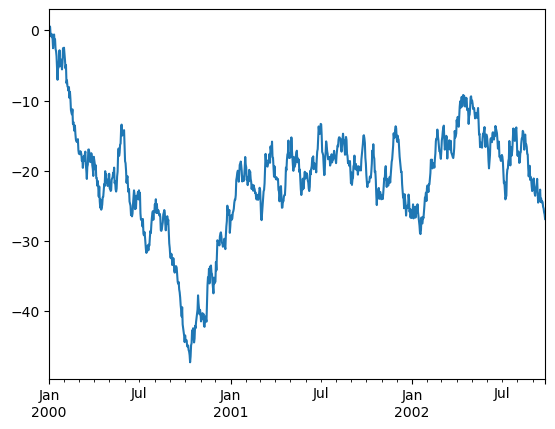

In [31]:
ts=pd.Series(np.random.randn(1000),index=pd.date_range('1/1/2000',periods=1000))
ts=ts.cumsum()
ts.plot()

在DataFrame上，```plot()```是一个函数可以方便地对数据的每个列进行绘图

<Axes: >

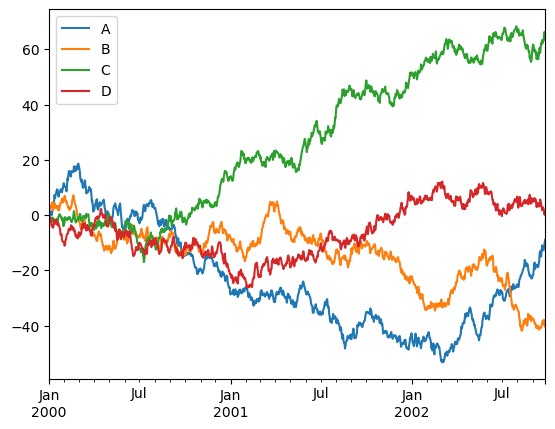

In [32]:
df=pd.DataFrame(np.random.randn(1000,4),index=ts.index,columns=['A','B','C','D'])
df=df.cumsum()
df.plot()

### 数据获取与导出
#### CSV
保存数据到csv文件中

In [ ]:
df1.to_csv('C:/mydata/foo.csv')

从csv中读取数据

In [ ]:
df=pd.read_csv('foo.csv')
print(df[:10])
df

#### Excel
生成Excel文件（需要安装openpyxl库```pip3 install openpyxl```）

In [ ]:
df.to_excel('foo.xlsx',sheet_name='Sheet01')

从Excel中读取数据

In [ ]:
print(pd.read_excel('foo.xlsx', 'Sheet01',
                    index_col=None, na_values=['NA'])[:10])

## 本节小练习：
通过pandas 加载 lesson1 中  lesson1 python & numpy\data/catering_dish_profit.csv
将lesson1-2最后的练习，使用pandas编写， 计算菜品的销售总额

